**Reading the Dataset**

In [1]:
# Read the data into a dataframe
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv')

<AxesSubplot: >

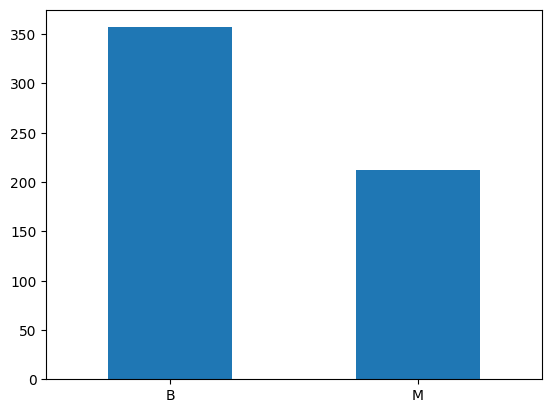

In [2]:
df.sort_values(by=['diagnosis'], inplace=True)
df['diagnosis'].value_counts().plot(kind='bar', rot=0)

**Dropping Unnecessary Columns**

In [3]:
drop_columns = ['id','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst',
'fractal_dimension_worst', 'Unnamed: 32', 'diagnosis']

df.drop(drop_columns, axis=1, inplace = True)
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
284,12.89,15.70,84.08,516.6,0.07818,0.09580,0.11150,0.03390,0.1432,0.05935
371,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544
367,12.21,18.02,78.31,458.4,0.09231,0.07175,0.04392,0.02027,0.1695,0.05916
364,13.40,16.95,85.48,552.4,0.07937,0.05696,0.02181,0.01473,0.1650,0.05701
363,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,0.1495,0.05593
...,...,...,...,...,...,...,...,...,...,...
146,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.07415,0.2678,0.07371
379,11.08,18.83,73.30,361.6,0.12160,0.21540,0.16890,0.06367,0.2196,0.07950
141,16.11,18.05,105.10,813.0,0.09721,0.11370,0.09447,0.05943,0.1861,0.06248
138,14.95,17.57,96.85,678.1,0.11670,0.13050,0.15390,0.08624,0.1957,0.06216


**Preprocessing & Visualization**

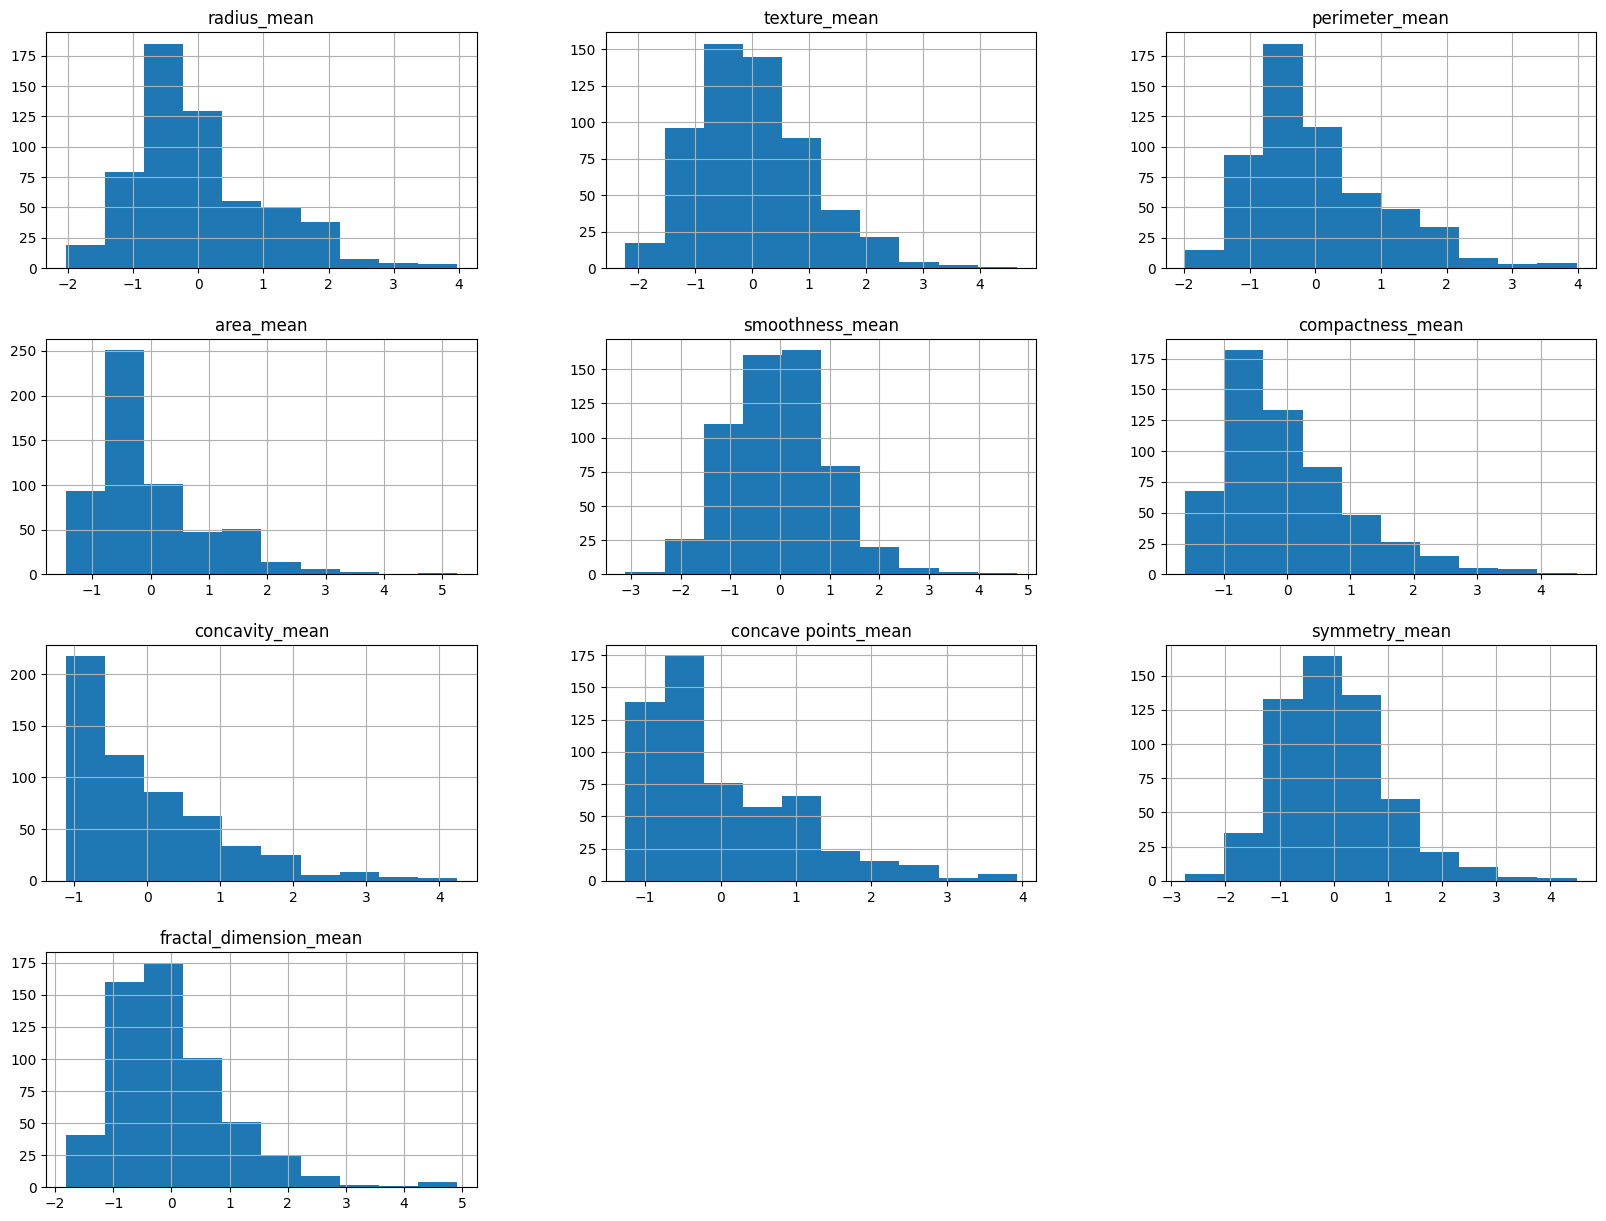

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

df_scaled.to_csv('data_refined.csv', index=False)

df_scaled.hist(figsize=(20,15))
plt.show()

<AxesSubplot: >

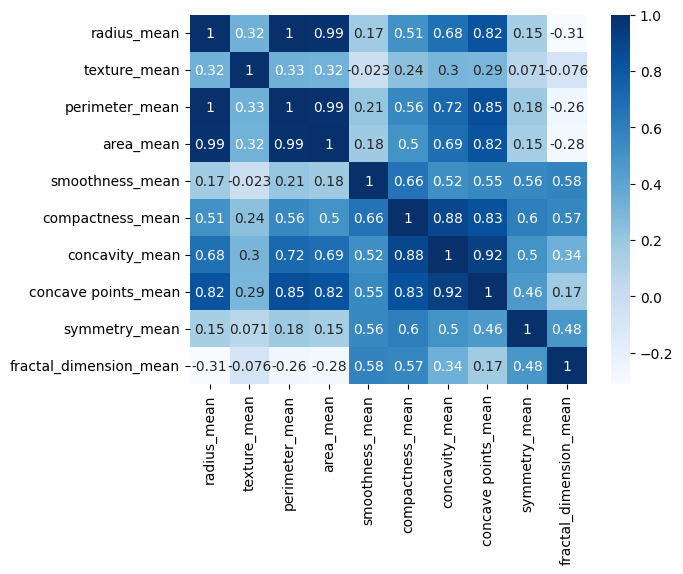

In [11]:
df.corr()
sns.heatmap(df.corr(), annot = True, cmap = "Blues")

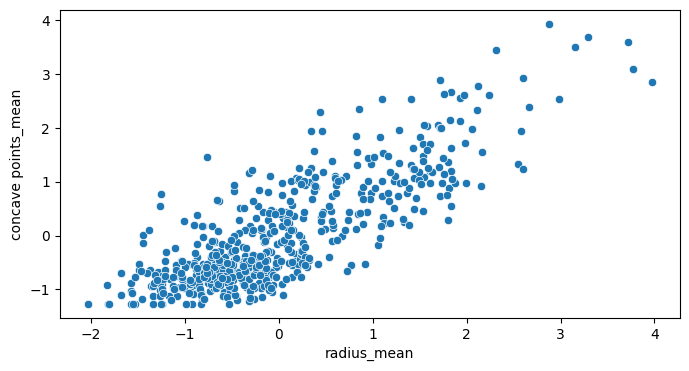

In [12]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='radius_mean', y='concave points_mean', data=df)
plt.show()

**Box and Violin plots**

The scaled data are used to make the visualization easier. A closer and more detailed look would require subplots with the actual values. There is no point doing that now.

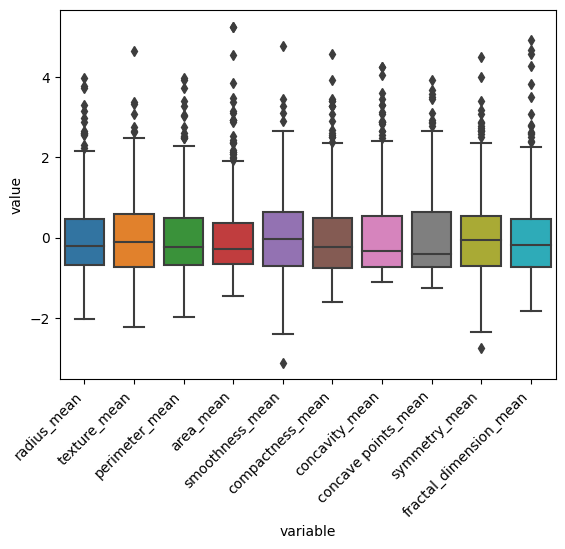

In [23]:
sns.boxplot(x="variable", y="value", data=pd.melt(df_scaled))
plt.xticks(rotation=45, ha='right')
plt.show()

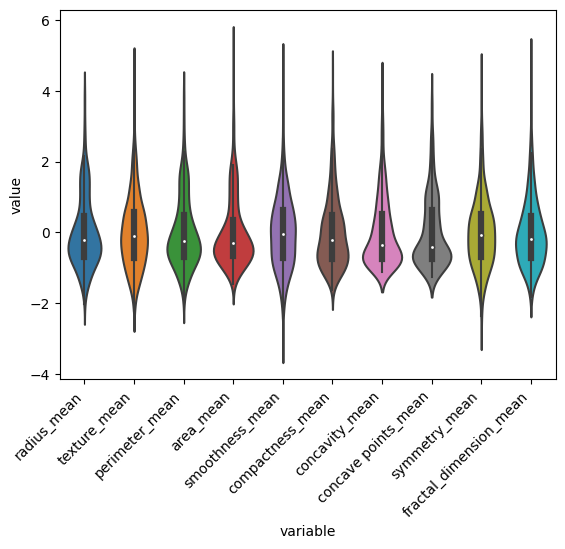

In [26]:
sns.violinplot(x="variable", y="value", data=pd.melt(df_scaled))
plt.xticks(rotation=45, ha='right')
plt.show()

# Violin plot is similar to boxplot with the difference that it shows the actual data distribution as well - showing data spread and dispersion.

From the violin plot we can see some outliers for all the variables (see black line above each plot, ~ above scaled value 2.